In [111]:
%load_ext autoreload
%autoreload 2
from DarkMatter import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
Likelihood.EventDisplay.initialize(dwarf = "segue_1", effCut=0.15, biasCut=0.2, export=True, ext=True)

[Warning] run 49484 does not have gMeanEnergySystematicError.
[Warning] The bias cut is set to 10^{-0.6} TeV (250 GeV)
[Warning] run 49581 does not have gMeanEnergySystematicError.
[Warning] The bias cut is set to 10^{-0.6} TeV (250 GeV)
[Warning] run 49582 does not have gMeanEnergySystematicError.
[Warning] The bias cut is set to 10^{-0.6} TeV (250 GeV)
[Warning] run 49652 does not have gMeanEnergySystematicError.
[Warning] The bias cut is set to 10^{-0.6} TeV (250 GeV)
[Warning] run 49654 does not have gMeanEnergySystematicError.
[Warning] The bias cut is set to 10^{-0.6} TeV (250 GeV)
[Warning] run 49726 does not have gMeanEnergySystematicError.
[Warning] The bias cut is set to 10^{-0.6} TeV (250 GeV)
[Warning] run 49855 does not have gMeanEnergySystematicError.
[Warning] The bias cut is set to 10^{-0.6} TeV (250 GeV)
[Warning] run 49862 does not have gMeanEnergySystematicError.
[Warning] The bias cut is set to 10^{-0.6} TeV (250 GeV)
[Warning] run 49920 does not have gMeanEnergySys

In [4]:
dwarf = "segue_1"
M = 3000
package="VEGAS"
irf_h = ResponseFunction.EventDisplay.averagedIRFs("segue_1", irf_file = "hard_020.root", export=False, ext=True)
irf_m = ResponseFunction.EventDisplay.averagedIRFs("segue_1", irf_file = "moderate_012.root", export=False, ext=True)
irf_s = ResponseFunction.EventDisplay.averagedIRFs("segue_1", irf_file = '/Users/dtak/Research/DarkMatter/RefData/EventDisplay_IRFs_segue_1.root', export=False, ext=True)

Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).


In [29]:
raw_events = Likelihood.eventdisplay.readData(dwarf, rawdata=True, ext=True, version="all")

In [71]:
dwarf = "segue_1"
channel = "tt"
mass = np.logspace(2, 4.5, 15)[1:]
package="EventDisplay"
#filename = "comp_el"
#filename=None
jSeed=defaultNum[dwarf]

Likelihood.calcExpectedLimits(dwarf, channel, irf=irf_s, mass=mass, package=package, method=2, averagedIRF=True, 
                              jArray=True, jSeed=jSeed, addTheta=False, version="all", ext=True,
                              useBias=True, filename="soft_cut", multi=True, th2cut=0.008,
                              verbosity=0, runs=100)

  0%|          | 0/100 [00:00<?, ?it/s]

/Users/dtak/Software/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/dtak/Software/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[Log] Package      : EventDisplay
[Log] Dwarf        : segue_1
[Log] Channel      : tt
[Log] Dataset      : Extended
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/15 [00:00<?, ?it/s]

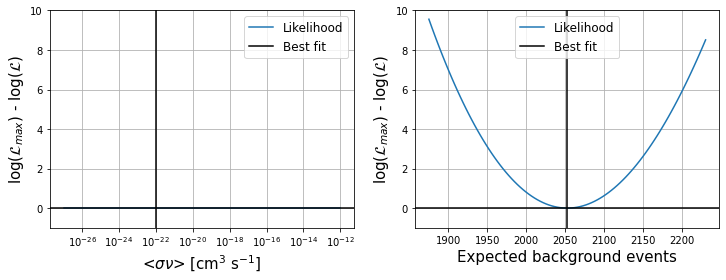

[Log, Error] The upper limit is not estimated (M=0.100 TeV).


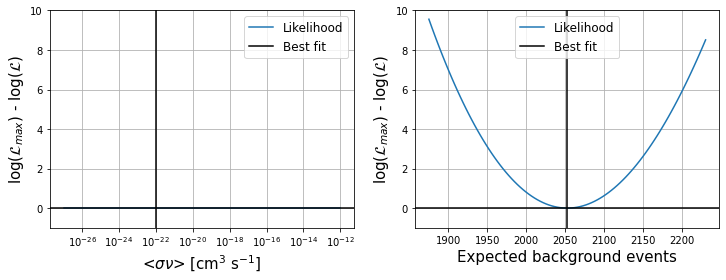

[Log, Error] The upper limit is not estimated (M=0.151 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/hard_ul.npy'


In [113]:
OUTPUT = Likelihood.calcUpperLimits(dwarf, channel, irf=irf_h, package=package, method=2, th2Cut=0.02, 
                        averagedIRF=True, filename="hard_ul", 
                        jArray=True, jSeed=defaultNum[dwarf], addTheta=False, version="all", ext=True, 
                        useBias=True, returnMLE=True)

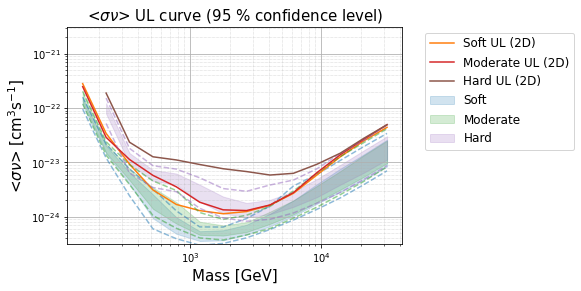

In [116]:
Likelihood.plotExpULcurve("soft_cut", label="Soft")
#Likelihood.plotULcurve("soft_ul", label="Soft UL" )
Likelihood.plotULcurve("soft_ul_2d", label="Soft UL (2D)" )
Likelihood.plotExpULcurve("moderate_cut", label="Moderate")
Likelihood.plotULcurve("moderate_ul_2d", label="Moderate UL (2D)" )
Likelihood.plotExpULcurve("hard_cut", label="Hard")
Likelihood.plotULcurve("hard_ul_2d", label="Hard UL (2D)" )

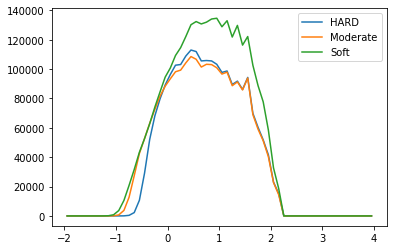

In [11]:
plt.plot(*getArray(irf_h.EA), label="HARD")
plt.plot(*getArray(irf_m.EA), label="Moderate")
plt.plot(*getArray(irf_s.EA), label="Soft")
plt.legend()
#plt.yscale("log")

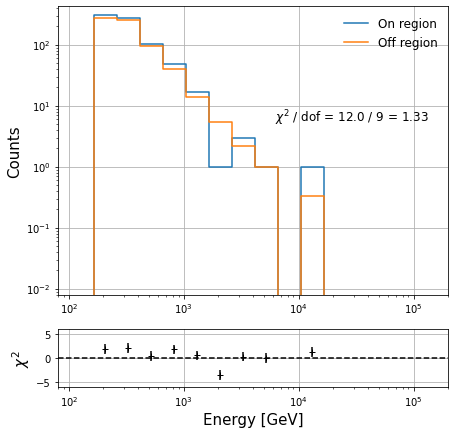

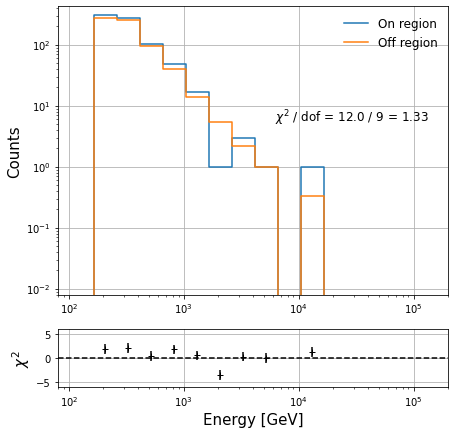

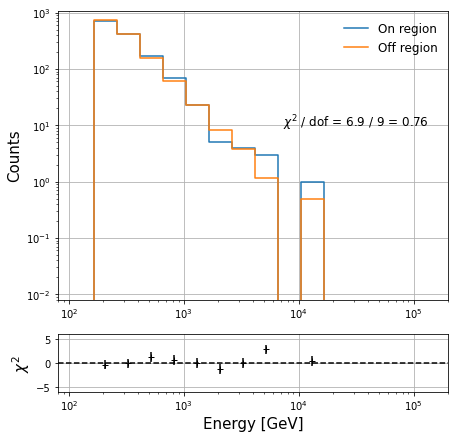

In [110]:
Likelihood.EventDisplay.plotData("segue_1",  ext=True)
Likelihood.EventDisplay.plotData("segue_1", evt_file="evt_moderate", ext=True)
Likelihood.EventDisplay.plotData("segue_1", evt_file="evt_soft", ext=True)

In [3]:
h1, hOff_h, N_on_h, N_off_h, evts_h, d = Likelihood.EventDisplay.readData("segue_1", evt_file="evt_hard", full_output=True, ext=True)
h1, hOff_m, N_on_m, N_off_m, evts_m, d = Likelihood.EventDisplay.readData("segue_1", evt_file="evt_moderate", full_output=True, ext=True)
h1, hOff_s, N_on_s, N_off_s, evts_s, d = Likelihood.EventDisplay.readData("segue_1", evt_file="evt_soft", full_output=True, ext=True)

In [4]:
hg_1d_h = Likelihood.calcSignal(dwarf, M, irf_h, package, channel="tt", ext=True, jArray=True, 
                                jSeed=defaultNum[dwarf], sigma=-22.5)

hg_1d_m = Likelihood.calcSignal(dwarf, M, irf_m, package, channel="tt", ext=True, jArray=True, 
                                th2Cut = 0.012, 
                                jSeed=defaultNum[dwarf], sigma=-22.5)

hg_1d_s = Likelihood.calcSignal(dwarf, M, irf_s, package, channel="tt", ext=True, jArray=True, 
                                th2Cut = 0.008, 
                                jSeed=defaultNum[dwarf], sigma=-22.5)

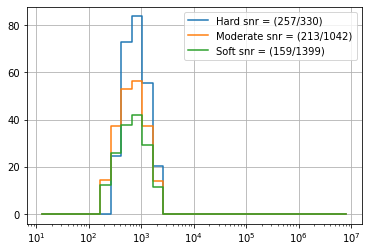

In [71]:
plt.step(*getArray(hg_1d_h),where="mid", 
         label="Hard snr = ({:.0f}/{:.0f})".format(sum(getArray(hg_1d_h)[1]), sum(getArray(hOff_h)[1])))
plt.step(*getArray(hg_1d_m),where="mid", 
         label="Moderate snr = ({:.0f}/{:.0f})".format(sum(getArray(hg_1d_m)[1]), sum(getArray(hOff_m)[1])))
plt.step(*getArray(hg_1d_s),where="mid", 
         label="Soft snr = ({:.0f}/{:.0f})".format(sum(getArray(hg_1d_s)[1]), sum(getArray(hOff_s)[1])))
plt.xscale("log")
plt.grid()
plt.legend()

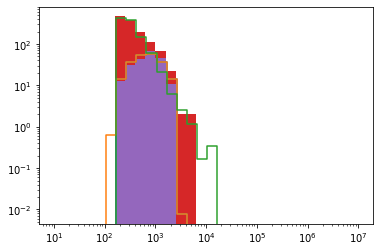

In [183]:
x, y = getArray(test["signal"], return_edges=True)
plt.step(*getArray(test["signal"]), where="mid")
plt.step(*getArray(hg_1d_test), where="mid")
plt.step(*getArray(test["bkg"]), where="mid")
plt.hist(events, y)
plt.hist(events2, y)
plt.xscale("log")
plt.yscale("log")

In [16]:

test = {"signal": hg_1d_m, 
        "bkg": hOff_m, 
        "irf": irf_m,
        "Nsig": int(sum(getArray(hg_1d_m)[1])),
        "Non": N_on_m,
        "Noff": N_off_m,
        "evt_file": "evt_moderate",
        "events": evts_m,
        "minE": min(evts_m[:,0][evts_m[:,2]==0]),
        "th2Cut": 0.012,
        "result": [],
        "ts": []}

In [7]:

test = {"signal": hg_1d_h, 
        "bkg": hOff_h, 
        "irf": irf_h,
        "Nsig": int(sum(getArray(hg_1d_h)[1])),
        "Noff": N_off_h,
        "events": evts_h,
        "evt_file": "evt_hard",
        "minE": min(evts_h[:,0][evts_h[:,2]==0]),
        "th2Cut": 0.02,
        "result": [],
        "ts": []}

In [293]:

test = {"signal": hg_1d_s, 
        "bkg": hOff_s, 
        "irf": irf_s,
        "Nsig": int(sum(getArray(hg_1d_s)[1])),
        "Noff": N_off_s,
        "events": evts_s,
        "evt_file": "evt_soft",
        "minE": min(evts_s[:,0][evts_s[:,2]==0]),
        "th2Cut": 0.008,
        "result": [],
        "ts": []}

In [17]:
hSig = Likelihood.calcSignal(dwarf, M, irf_s, package, channel="tt", ext=True, jArray=True, 
                                th2Cut = test["th2Cut"], 
                                jSeed=defaultNum[dwarf], sigma=-22.5,
                                eLowerCut=test["minE"])
for i in trange(100):
    events = Likelihood.simulation.fake_evt_set(test["Noff"]/6+test["Nsig"], test["signal"], test["events"], minE = test["minE"])
    
    N_on = len(events[:,0])
    mle = Likelihood.MLE(dwarf, M, "EventDisplay", decay="tt", addTheta=False, jSeed=defaultNum[dwarf],
                     averagedIRF=True, ext=True, th2Cut=test["th2Cut"], hSignal = hSig, signu=-22.5,
                     test=True, events = events, irf=test["irf"], evt_file=test["evt_file"], useBias=True, 
                     N_on = np.size(events), verbose=False, statistic="unbinned") 
    mle.minuit(method=2, upperLimit=False)

#     mle = Likelihood.MLE(dwarf, M, package="EventDisplay", jArray=True, jSeed=defaultNum[dwarf],
#                          addTheta=False, decay="tt", averagedIRF=True, useBias=True, 
#                          verbose=False, irf=test["irf"], ext=True, evt_file=test["evt_file"]) 
#     mle._signu0 = -22.5
#     mle.N_on = N_on
#     mle.N_off = test["Noff"]
#     mle.events = events
#     mle.hSignal = test["signal"]
#     mle.hOff = test["bkg"]
#     mle.updateArgs(forced=True)
    
    mle.minuit()
    test["result"].append(mle.signu)
    test["ts"].append(mle.ts)

test["result"] = np.asarray(test["result"])
test["ts"] = np.asarray(test["ts"])

  0%|          | 0/100 [00:00<?, ?it/s]

 MNCONT UNABLE TO FIND FOUR POINTS.
 MNCONT UNABLE TO FIND FOUR POINTS.
 MNCONT UNABLE TO FIND FOUR POINTS.
 MNCONT UNABLE TO FIND FOUR POINTS.
 MNCONT UNABLE TO FIND FOUR POINTS.
 MNCONT UNABLE TO FIND FOUR POINTS.
 MNCONT UNABLE TO FIND FOUR POINTS.
 FUNCTION MUST BE MINIMIZED BEFORE CALLING MIGRAD  
 MNCONT UNABLE TO FIND FOUR POINTS.
 MNCONT UNABLE TO FIND FOUR POINTS.
 MNCONT UNABLE TO FIND FOUR POINTS.


Warning in <TMinuit::Contour>: Cannot find more than 4 points, no TGraph returned
Warning in <TMinuit::Contour>: Cannot find more than 4 points, no TGraph returned
Warning in <TMinuit::Contour>: Cannot find more than 4 points, no TGraph returned
Warning in <TMinuit::Contour>: Cannot find more than 4 points, no TGraph returned
Warning in <TMinuit::Contour>: Cannot find more than 4 points, no TGraph returned
Warning in <TMinuit::Contour>: Cannot find more than 4 points, no TGraph returned
Warning in <TMinuit::Contour>: Cannot find more than 4 points, no TGraph returned
Warning in <TMinuit::Contour>: Cannot find more than 4 points, no TGraph returned
Warning in <TMinuit::Contour>: Cannot find more than 4 points, no TGraph returned
Warning in <TMinuit::Contour>: Cannot find more than 4 points, no TGraph returned


In [269]:
hard=test

In [253]:
moderate=test

In [277]:
soft=test

In [295]:
soft_unbinned = test

In [11]:
hard_unbinned = test

In [18]:
moderate_unbinned = test

Text(0.5, 0, 'TS')

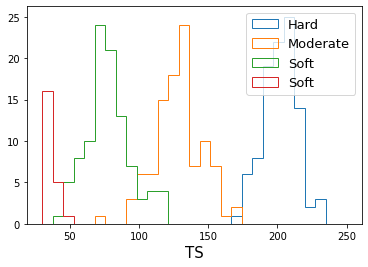

In [296]:
plt.hist(hard["ts"], np.linspace(30, 250, 30), histtype="step", label="Hard")
plt.hist(moderate["ts"], np.linspace(30, 250, 30), histtype="step", label="Moderate")
plt.hist(soft["ts"], np.linspace(30, 250, 30), histtype="step", label="Soft")

plt.legend(fontsize=13)
plt.xlabel("TS", fontsize=15)

Text(0.5, 0, 'Sigmanu')

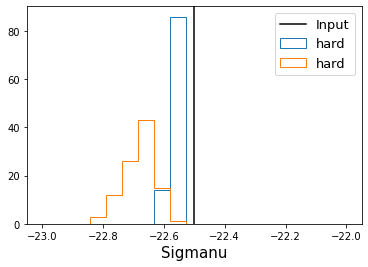

In [19]:
#plt.hist(hard["result"][:,0], np.linspace(-23.3, -22.8, 20), histtype="step", label="Hard")
#plt.hist(moderate["result"][:,0], np.linspace(-23.3, -22.8, 20), histtype="step", label="Moderate")
#plt.hist(soft["result"][:,0], np.linspace(-23.3, -22.8, 20), histtype="step", label="Soft")
#plt.hist(soft_unbinned["result"][:,0], np.linspace(-23.3, -22.8, 20), histtype="step", label="Soft")
plt.hist(hard_unbinned["result"][:,0], np.linspace(-23, -22., 20), histtype="step", label="hard")
plt.hist(moderate_unbinned["result"][:,0], np.linspace(-23, -22., 20), histtype="step", label="hard")

plt.axvline(-22.5, color="k", label="Input")
plt.legend(fontsize=13)
plt.xlabel("Sigmanu", fontsize=15)

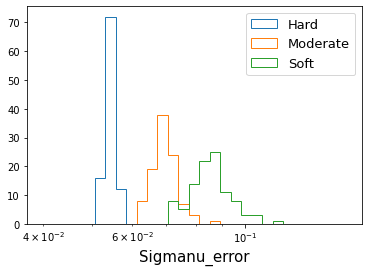

In [291]:
plt.hist(hard["result"][:,1], np.logspace(-1.4, -0.8, 30), histtype="step", label="Hard")
plt.hist(moderate["result"][:,1], np.logspace(-1.4, -0.8, 30), histtype="step", label="Moderate")
plt.hist(soft["result"][:,1], np.logspace(-1.4, -0.8, 30), histtype="step", label="Soft")
plt.legend(fontsize=13)
plt.xlabel("Sigmanu_error", fontsize=15)
plt.xscale("log")

In [118]:
plt.style.use("default")

In [177]:
x = np.load(const.OUTPUT_DIR+"hawc_like_ttbar_jsys.npy", allow_pickle=True).item()

In [178]:
k = []
for m in x.keys():
    z = (10**np.asarray(x[m])-10**np.average(x[m]))/10**np.average(x[m])
    print(np.std(z))
    k.append(np.std(z))
    print(10**(np.average(x[m])+np.std(x[m]))/10**np.average(x[m]))

1.3071533485674238
2.405132722828292
1.7530245981624397
2.5221524007458695
1.7293597968461119
2.667409902855487
2.0382055868040276
2.335167934204841
1.8721596102922569
2.677069385575243
1.916727560912123
2.514340516307976
2.0314883950873255
2.5776157458342173


In [179]:
np.average(k)

1.8068741280959586

2.58756263016525

(array([ 2.,  2.,  9., 13., 22., 31., 15.,  4.,  1.,  1.]),
 array([-20.07132465, -19.81258896, -19.55385327, -19.29511758,
        -19.03638189, -18.77764621, -18.51891052, -18.26017483,
        -18.00143914, -17.74270346, -17.48396777]),
 <BarContainer object of 10 artists>)

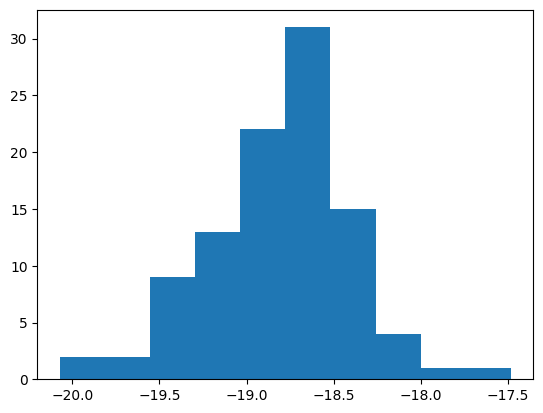

In [163]:
plt.hist(x[m])

In [126]:
np.average(x[m])

-17.589789842992868

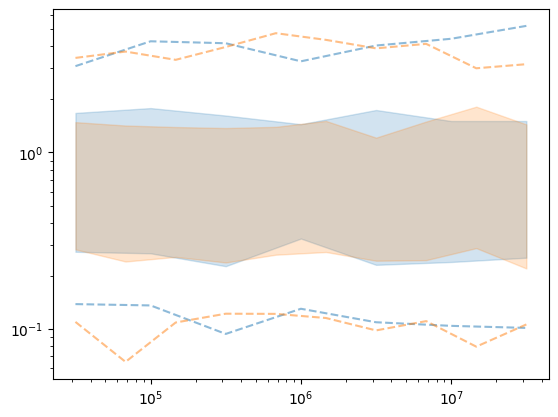

In [248]:
x = np.load(const.OUTPUT_DIR+"hawc_like_ttbar_jsys.npy", allow_pickle=True).item()

z = []
for m in x.keys():
    ave = np.average(10**np.asarray(x[m]))
    val = 10**np.asarray(x[m])/ave
    
    z.append([m, np.percentile(val, 16), np.percentile(val, 84), np.percentile(val, 2.5), np.percentile(val, 97.5)])

z = np.asarray(z)

etc = plt.plot(z[:,0], z[:,3], alpha=0.5, ls="--")
plt.plot(z[:,0], z[:,4], alpha=0.5, ls="--", color = etc[0].get_color())

plt.fill_between(z[:,0], z[:,1], z[:,2], color = etc[0].get_color(), alpha=0.2)


x = np.load(const.OUTPUT_DIR+"cta_like_ttbar_jsys.npy", allow_pickle=True).item()

z = []
for m in x.keys():
    ave = np.average(10**np.asarray(x[m]))
    val = 10**np.asarray(x[m])/ave
    
    z.append([m, np.percentile(val, 16), np.percentile(val, 84), np.percentile(val, 2.5), np.percentile(val, 97.5)])

z = np.asarray(z)

etc = plt.plot(z[:,0], z[:,3], alpha=0.5, ls="--")
plt.plot(z[:,0], z[:,4], alpha=0.5, ls="--", color = etc[0].get_color())

plt.fill_between(z[:,0], z[:,1], z[:,2], color = etc[0].get_color(), alpha=0.2)

plt.xscale("log")
plt.yscale("log")

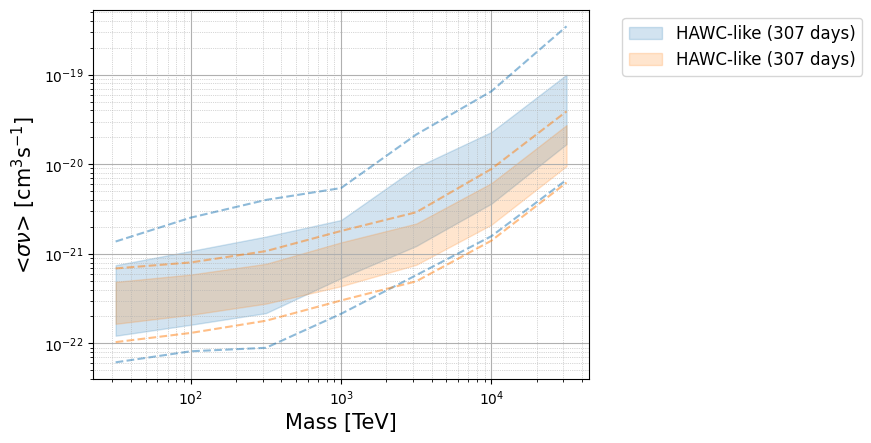

In [251]:
Likelihood.plotExpULcurve(filename="hawc_like_ttbar_jsys", label="HAWC-like (307 days)", which = [68, 95], units="TeV")

Likelihood.plotExpULcurve(filename="hawc_like_ttbar_sys", label="HAWC-like (307 days)", which = [68, 95], units="TeV")

In [ ]:
etc = ax.plot(mass, error_cont[:,2], alpha=0.5, ls="--", **kwargs)    
            ax.plot(mass, error_cont[:,3], alpha=0.5, ls="--", color = etc[0].get_color())
        if 68 in which:
            if 95 in which:
                ax.fill_between(mass, error_cont[:,0], error_cont[:,1], color = etc[0].get_color(), alpha=0.2, label=label)
            

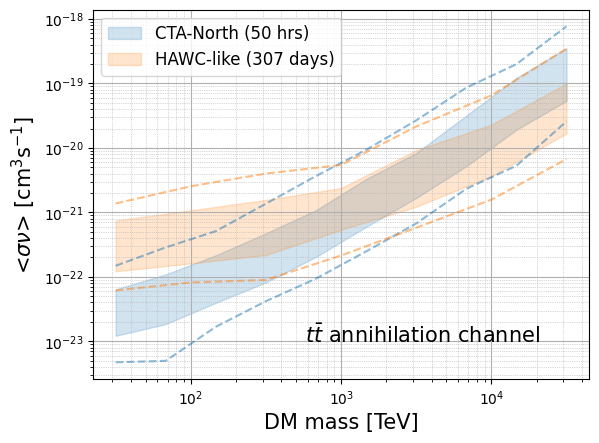

In [184]:
#Likelihood.plotExpULcurve(filename="vts_like_ttbar_jsys", label="VERITAS-like (50 hrs)", which = [68, 95], units="TeV")
Likelihood.plotExpULcurve(filename="CTA_like_ttbar_jsys", label="CTA-North (50 hrs)", which = [68, 95], units="TeV")
Likelihood.plotExpULcurve(filename="hawc_like_ttbar_jsys", label="HAWC-like (307 days)", which = [68, 95], units="TeV")

plt.legend(loc=2, fontsize=12)
ax = plt.gca()
plt.text(0.9, 0.1, r"$t\bar{t}$ annihilation channel", fontsize=15, ha="right", transform=ax.transAxes)
plt.xlabel("DM mass [TeV]", fontsize=15)
plt.savefig("sys_err.pdf")

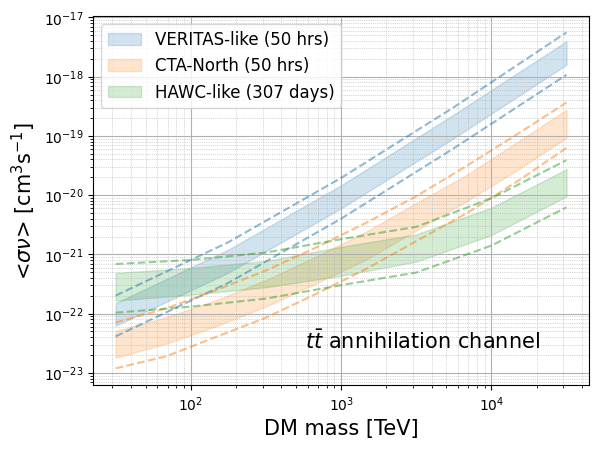

In [119]:
Likelihood.plotExpULcurve(filename="vts_like_ttbar_sys", label="VERITAS-like (50 hrs)", which = [68, 95], units="TeV")
Likelihood.plotExpULcurve(filename="CTA_like_ttbar_sys", label="CTA-North (50 hrs)", which = [68, 95], units="TeV")
Likelihood.plotExpULcurve(filename="hawc_like_ttbar_sys", label="HAWC-like (307 days)", which = [68, 95], units="TeV")

plt.legend(loc=2, fontsize=12)
ax = plt.gca()
plt.text(0.9, 0.1, r"$t\bar{t}$ annihilation channel", fontsize=15, ha="right", transform=ax.transAxes)
plt.xlabel("DM mass [TeV]", fontsize=15)
plt.savefig("stat_err.pdf")